# Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = df[['LSTAT']].values
y = boston_data.target

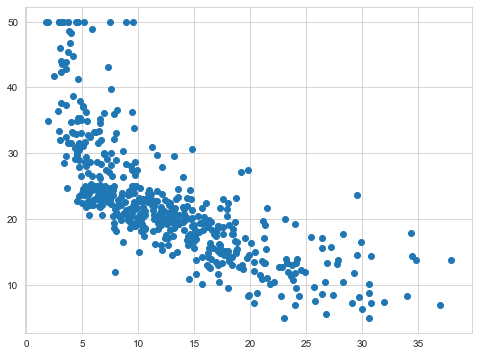

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X, y);

## No pre-processing

In [7]:
# Gradient Descent
alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

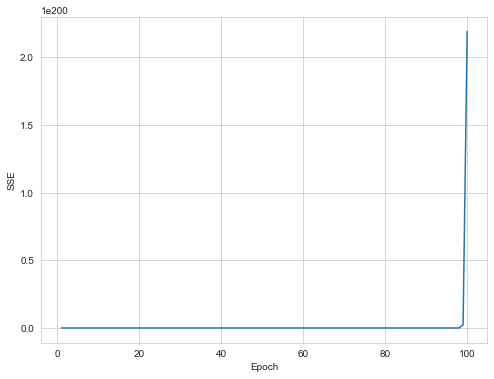

In [8]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

## Pre-processing

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# standardize X and y
# scale it
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [14]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

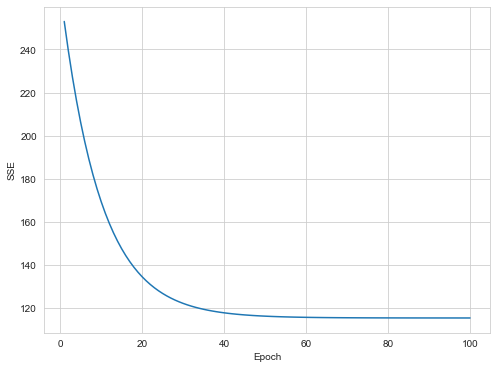

In [15]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

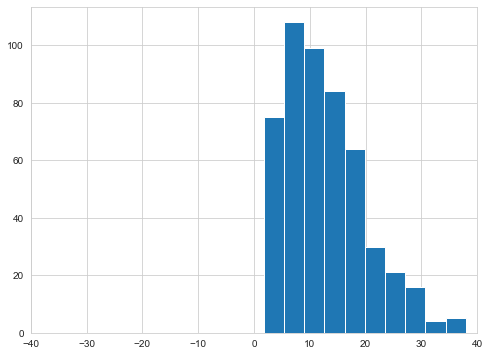

In [18]:
# before preprocessing
plt.figure(figsize=(8,6))
plt.hist(X);
plt.xlim(-40, 40);

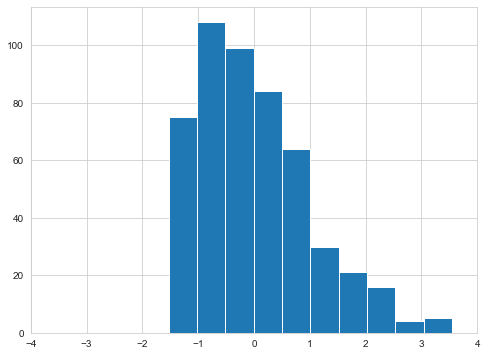

In [19]:
# after preprocessing
plt.figure(figsize=(8,6))
plt.hist(X_std);
plt.xlim(-4, 4);

## Data Pre-processing


4 types of pre-processing to numerical attributes
* Standardization / Mean Removal

* Min-Max or Scaling Features to a Range

* Normalization

* Binarization

Assumptions:

* Implicit/explicit assumption of machine learning algorithms: The features follow a normal distribution.
* Most method are based on linear assumptions
* Most machine learning requires the data to be standard normally distributed. Gaussian with zero mean and unit variance.

[scikit-learn:](http://scikit-learn.org/stable/modules/preprocessing.html) In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) **assume that all features are centered around zero and have variance in the same order**. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.



In [20]:
from sklearn import preprocessing

In [21]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [22]:
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333])

### Standardization, Mean Removal and Variance Scaling


[scikit Scale](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

Mean is removed. Data is centered on zero. This is to remove bias.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. "standard normal" random variable with mean 0 and standard deviation 1.

$$X'=\frac{X-\bar{X}}{\sigma}$$

In [23]:
X_scaled = preprocessing.scale(X_train)

In [25]:
# Scaled data has zero mean and unit variance:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [26]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [27]:
X_scaled.std(axis=0)

array([1., 1., 1.])

Keeping in mind that if you have scaled your training data, you must do likewise with your test data as well. However, your assumption is that the mean and variance must be invariant between your train and test data. `scikit-learn` assists with a built-in utility function `StandardScaler`.

In [28]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [30]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [31]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

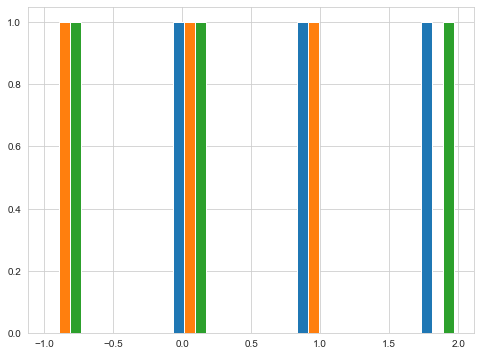

In [32]:
plt.figure(figsize=(8,6))
plt.hist(X_train);

You can now utilise the `transform` for new dataset